# Can Age Predict the Success of Top Tennis Players?

## Introduction

## Methods

### 0. Loading in required libraries

First, we will load in the necessary libraries and packages into R.


In [37]:
#Library Packages
library(tidyverse)
install.packages("janitor")
install.packages("kknn")
library(janitor)
library(repr)
library(tidymodels)
library(forcats)

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



### 1. Loading the dataset from the URL

We will then read the dataset via URL.

In [38]:
#Reads the data of the Top 500 Tennis Players
player_data <- read_csv("https://raw.githubusercontent.com/lukeelliotchan/dsci100_grp35/main/player_stats.csv") |>
    clean_names()

New names:
• `` -> `...1`
Rows: 500 Columns: 38
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (25): Age, Country, Plays, Wikipedia, Current Rank, Best Rank, Name, Bac...
dbl (13): ...1, Turned Pro, Seasons, Titles, Best Season, Retired, Masters, ...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


### 2. Cleaning and Wrangling the Data to a tidy format

The first step to clean and wrangle the data into the tidy format that we would like to have would first be separating cells data into columns that hold a unique variable. We see in the code, we separate age and date of birth and split them into two separate columns. We then selected our variables of interest: current_rank, current_elo_rank, prize_money, and age. Next, we will change the data type of the columns into the correct data type that the column contains. In this case, we expressed each column as numeric value. At the end, we also removed all NA values as they were very prevalent throughout our data set.

In [39]:
#Seperates values in cells and makes the format tidy
player_data_tidy <- player_data |>
    separate(current_rank, c("current_rank", "points"), " ") |>
    separate(current_elo_rank, c("current_elo_rank", "current_elo"), " ") |>
    separate(age, c("age", "dob"), " ") |>
    separate(prize_money, c("dollar", "prize_money"), "\\$") |>
    separate(prize_money, c("prize_money", "temp"), "  ") |>
    select(current_rank, current_elo_rank, prize_money, age)

#Cleans erroneous text and irrelevant information
player_data_cleaned <- player_data_tidy |>
    mutate(current_rank = as.numeric(current_rank)) |> 
        #turn the columns into numbers
    mutate(prize_money = as.numeric(gsub(",", "", prize_money))) |> 
        #rows that dont meet condition of becoming number are just NA
    mutate(current_elo_rank = gsub("\\(", "", current_elo_rank)) |>
    mutate(current_elo_rank = as.numeric(gsub("\\)","", current_elo_rank)))   |>                                      
    mutate(age = as.numeric(age)) |>
    na.omit()

head(player_data_cleaned)

Warning message:
“Expected 2 pieces. Additional pieces discarded in 2 rows [146, 441].”
Warning message:
“Expected 2 pieces. Missing pieces filled with `NA` in 412 rows [2, 3, 4, 5, 6,
7, 8, 9, 10, 11, 12, 13, 14, 15, 18, 19, 20, 21, 22, 23, ...].”
Warning message:
“There was 1 warning in `mutate()`.
ℹ In argument: `prize_money = as.numeric(gsub(",", "", prize_money))`.
Caused by warning:
! NAs introduced by coercion”


current_rank current_elo_rank prize_money age
1 178          144               3261567    32 
2 183          100               6091971    27 
3  31           33               1517157    22 
4 417          189                122734    25 
5  22           51               1893476    19 
6   4            5              10507693    23

Figure 2.1: Tidied Player Data

In [40]:
#Methods & Results A
#Reads the data of the Top 500 Tennis Players
player_data <- read_csv("https://raw.githubusercontent.com/lukeelliotchan/dsci100_grp35/main/player_stats.csv") |>
    clean_names()

#Seperates values in cells and makes the format tidy
player_data_tidy <- player_data |>
    separate(current_rank, c("current_rank", "points"), " ") |>
    separate(current_elo_rank, c("current_elo_rank", "current_elo"), " ") |>
    separate(age, c("age", "dob"), " ") |>
    separate(prize_money, c("dollar", "prize_money"), "\\$") |>
    separate(prize_money, c("prize_money", "temp"), "  ") |>
    select(current_rank, current_elo_rank, prize_money, age)

#Cleans erroneous text and irrelevant information
player_data_cleaned <- player_data_tidy |>
    mutate(current_rank = as.numeric(current_rank)) |> 
        #turn the columns into numbers
    mutate(prize_money = as.numeric(gsub(",", "", prize_money))) |> 
        #rows that dont meet condition of becoming number are just NA, will fix later
    mutate(current_elo_rank = gsub("\\(", "", current_elo_rank)) |>
    mutate(current_elo_rank = as.numeric(gsub("\\)","", current_elo_rank)))   |>                                      
    mutate(age = as.numeric(age)) |>
    na.omit()

head(player_data_cleaned)

New names:
• `` -> `...1`
Rows: 500 Columns: 38
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (25): Age, Country, Plays, Wikipedia, Current Rank, Best Rank, Name, Bac...
dbl (13): ...1, Turned Pro, Seasons, Titles, Best Season, Retired, Masters, ...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Warning message:
“Expected 2 pieces. Additional pieces discarded in 2 rows [146, 441].”
Warning message:
“Expected 2 pieces. Missing pieces filled with `NA` in 412 rows [2, 3, 4, 5, 6,
7, 8, 9, 10, 11, 12, 13, 14, 15, 18, 19, 20, 21, 22, 23, ...].”
Warning message:
“There was 1 warning in `mutate()`.
ℹ In argument: `prize_money = as.numeric(gsub(",", "", prize_money))`.
Caused by warning:
! NAs introduced by coercion”


current_rank current_elo_rank prize_money age
1 178          144               3261567    32 
2 183          100               6091971    27 
3  31           33               1517157    22 
4 417          189                122734    25 
5  22           51               1893476    19 
6   4            5              10507693    23

### 3. Visualizing the distribution of predictor variable across the data

Now that we have our complete tidy and cleaned data set, we can first observe our predictor variable, age. Mainly, the spread and the distribution of all of the Tennis Players that are included in the data.

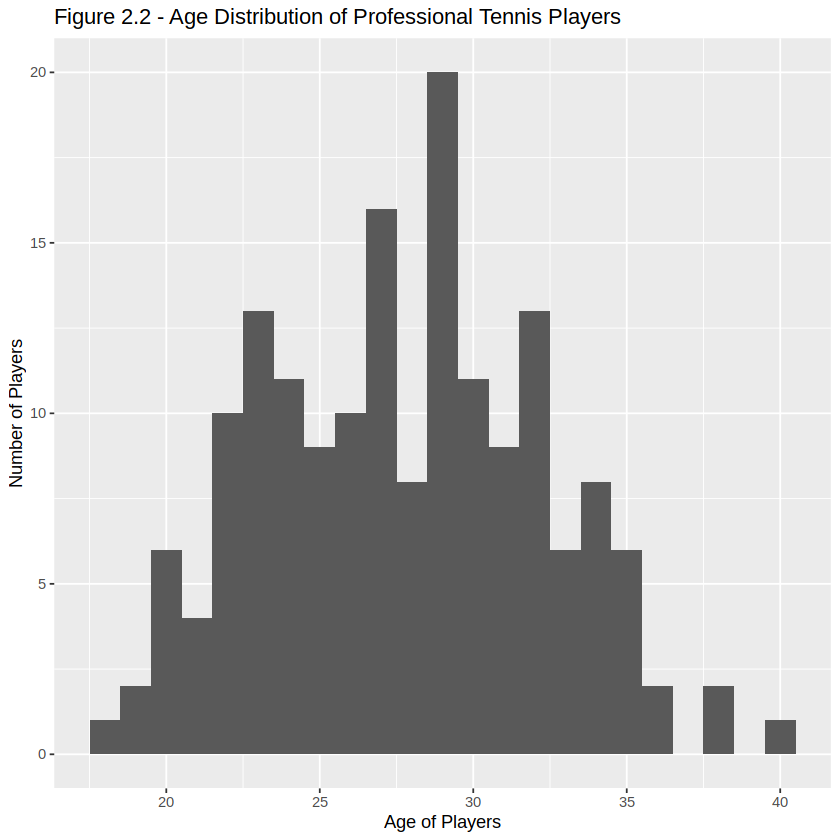

In [41]:
#Methods & Results B
#Plots the distribution of ages across all the players
age_distribution_plot <- player_data_cleaned |>
    ggplot(aes(x=age)) +
    geom_histogram(binwidth=1) +
    labs(x = "Age of Players", y = "Number of Players") +
    ggtitle("Figure 2.2 - Age Distribution of Professional Tennis Players")

age_distribution_plot

From observing the spread of the age of the tennis players, we can clearly see a normal distribution of the data. This is to be expected from age as a variable as most players would be in the middle of their career as a professional tennis player. Additionally, this definitely shows how much age affects the performance of players at certain ages. Next, we can summarize the spread of the data to find the mean and median age of the players. This would be related to our data analysis at a later time. 

In [42]:
age_estimates <- player_data_cleaned |>
    summarize(mean_age = mean(age), median_age = median(age))
age_estimates

mean_age median_age
1 27.72024 28

Figure 2.3: Summary Data of Player Age

### Splitting the data into training and testing

The next step is to split the data into training and testing data. We split the data so that training data contains 75% of the data set whereas the testing data contains the remaining 25%. Next, we used 5-fold validation to find the optimal K-value for knn-regression. A random set was also selected.

In [43]:
#Splits the data into training and testing sets
set.seed(143) #ensures all randomized functions work the same
data_split <- initial_split(player_data_cleaned, prop = 0.75, strata = prize_money)
player_training <- training(data_split)
player_testing <- testing(data_split)

current_rank_vfold <- vfold_cv(player_training, v = 5, strata = current_rank)
prize_money_vfold <- vfold_cv(player_training, v = 5, strata = prize_money)
current_elo_r_vfold <- vfold_cv(player_training, v = 5, strata = current_elo_rank)

### Initial Data Visualization
The initial data visualization includes:
1. Visualizing the relationship between Age and Prize money
2. Visualizing the relationship between Age and current rank
3. Visualizing the relationship between Age and current elo rank

### 1. Visualizing the relationship between Age and Prize money

The following is a scatter plot that shows the relationship between prize money and age. Prize money was specifically chosen because of the fact that it shows the extent in winnings of a tennis player, or in other words, the success that the tennis player have had in competitions. First, we will plot a scatter plot to see the relationship between prize money and age of the top 500 players. The plot is then scaled.

Saving 6.67 x 6.67 in image


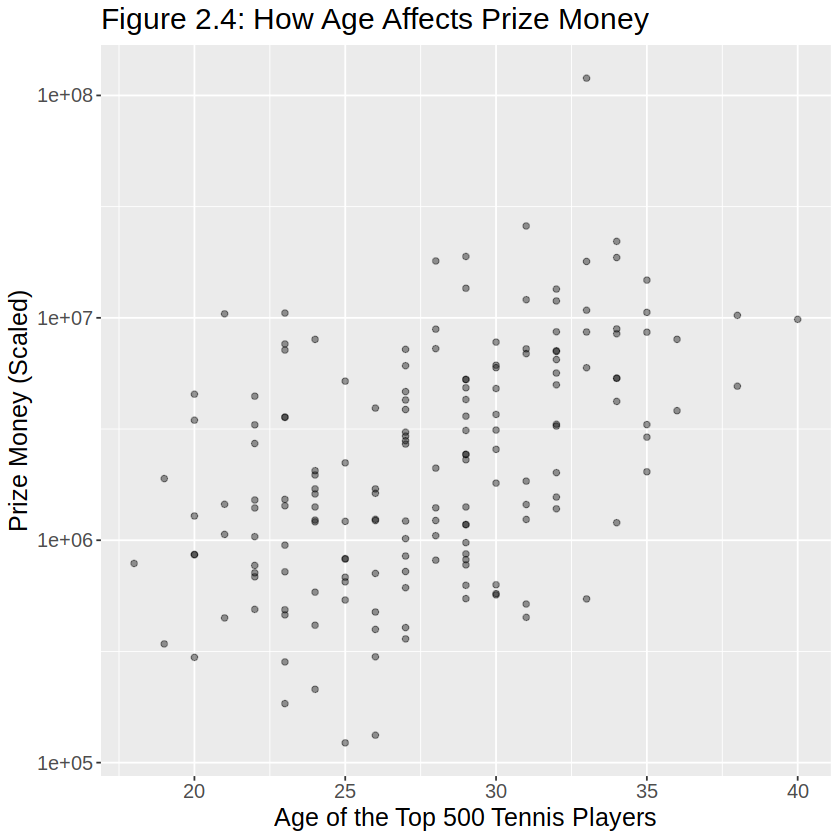

In [44]:
age_money_plot <- player_data_cleaned |>
    ggplot(aes(x=age, y= prize_money))+
    geom_point(alpha=0.4)+
    labs(x="Age of the Top 500 Tennis Players", y= "Prize Money (Scaled)") +
    scale_y_log10() +
    ggtitle("Figure 2.4: How Age Affects Prize Money") +
    theme(text = element_text(size=15))
ggsave("age_money_plot.png",age_money_plot)
age_money_plot

### 2. Visualizing the relationship between Age and current rank

Next, we will see the visualization of the relationship between current rank and age. The same process was used previously.

Saving 6.67 x 6.67 in image


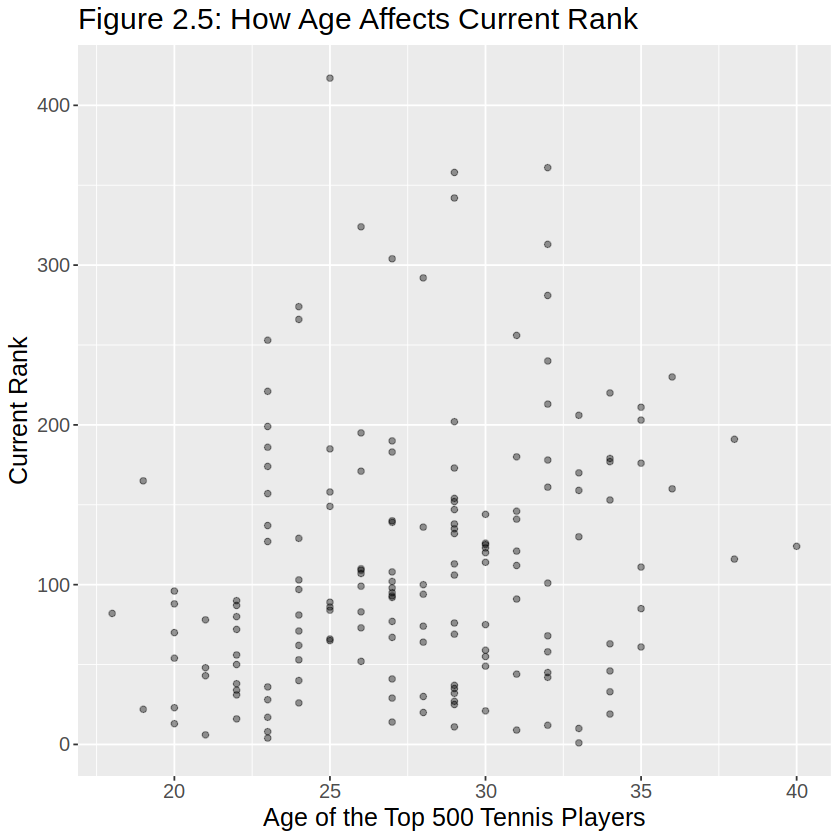

In [45]:
age_rank_plot <- player_data_cleaned |>
    ggplot(aes(x=age, y= current_rank))+
    geom_point(alpha=0.4)+
    labs(x="Age of the Top 500 Tennis Players", y= "Current Rank") +
    ggtitle("Figure 2.5: How Age Affects Current Rank") +
    theme(text = element_text(size=15)) 
ggsave("age_rank_plot.png",age_rank_plot)
age_rank_plot

### 3. Visualizing the relationship between Age and current elo rank

Finally, the relationship between current elo rank and age are as followed...

Saving 6.67 x 6.67 in image


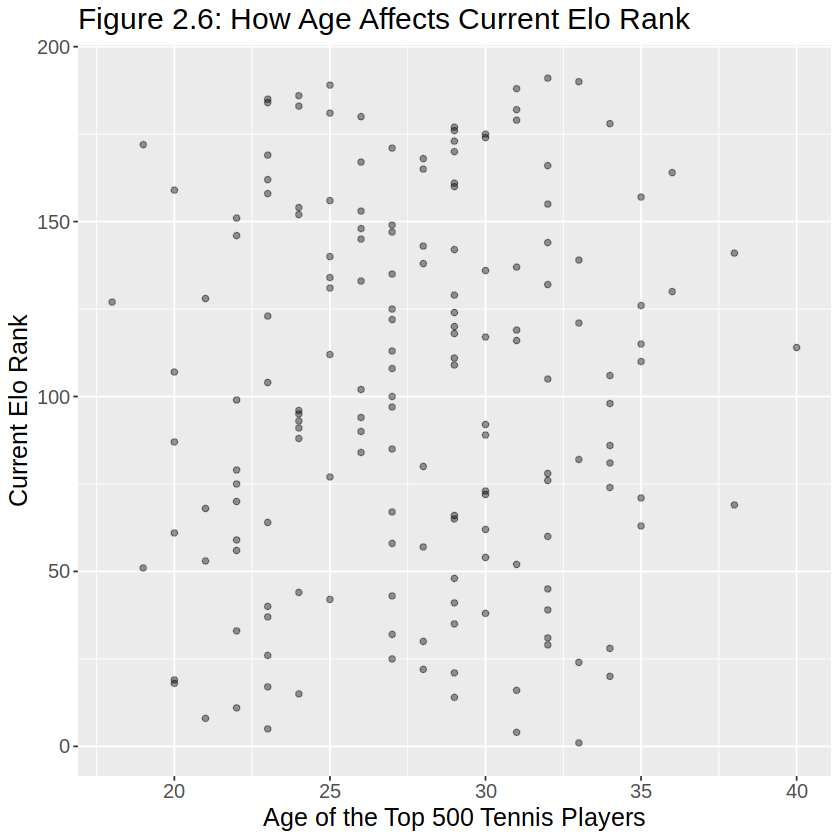

In [46]:
age_elo_plot <- player_data_cleaned |>
    ggplot(aes(x=age, y= current_elo_rank))+
    geom_point(alpha=0.4)+
    labs(x="Age of the Top 500 Tennis Players", y= "Current Elo Rank") +
    ggtitle("Figure 2.6: How Age Affects Current Elo Rank")+
    theme(text = element_text(size=15))
ggsave("age_elo_plot.png", age_elo_plot)
age_elo_plot

Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image


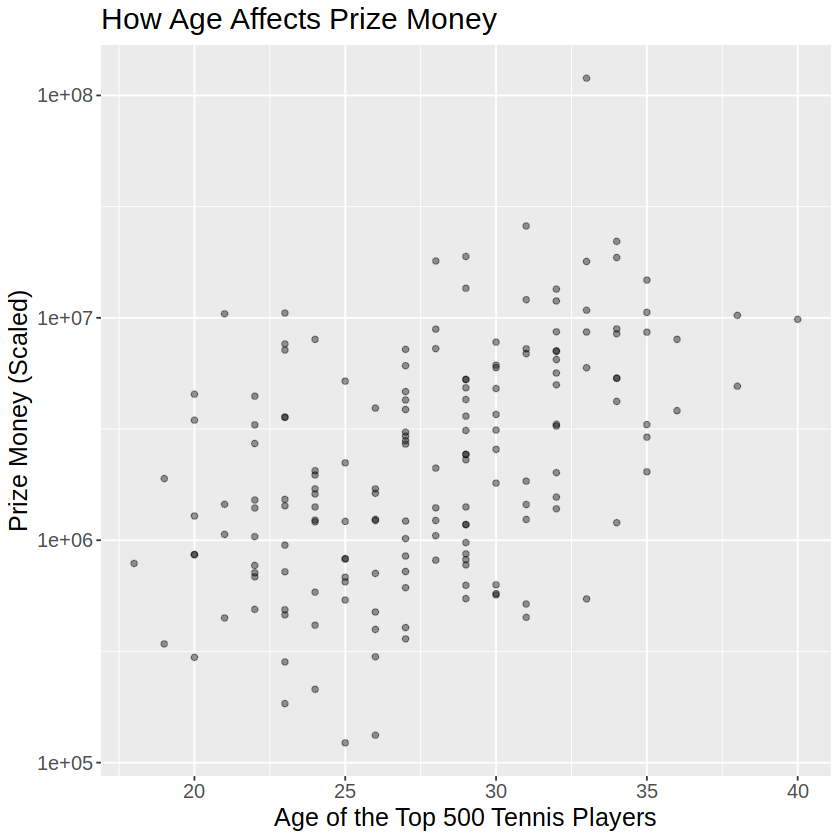

Saving 6.67 x 6.67 in image


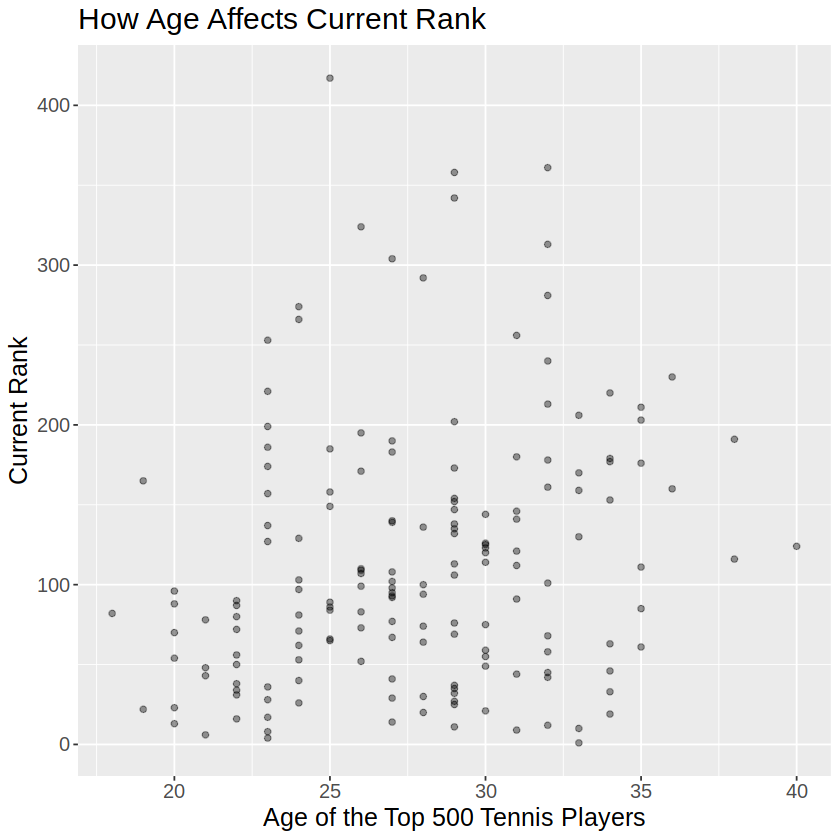

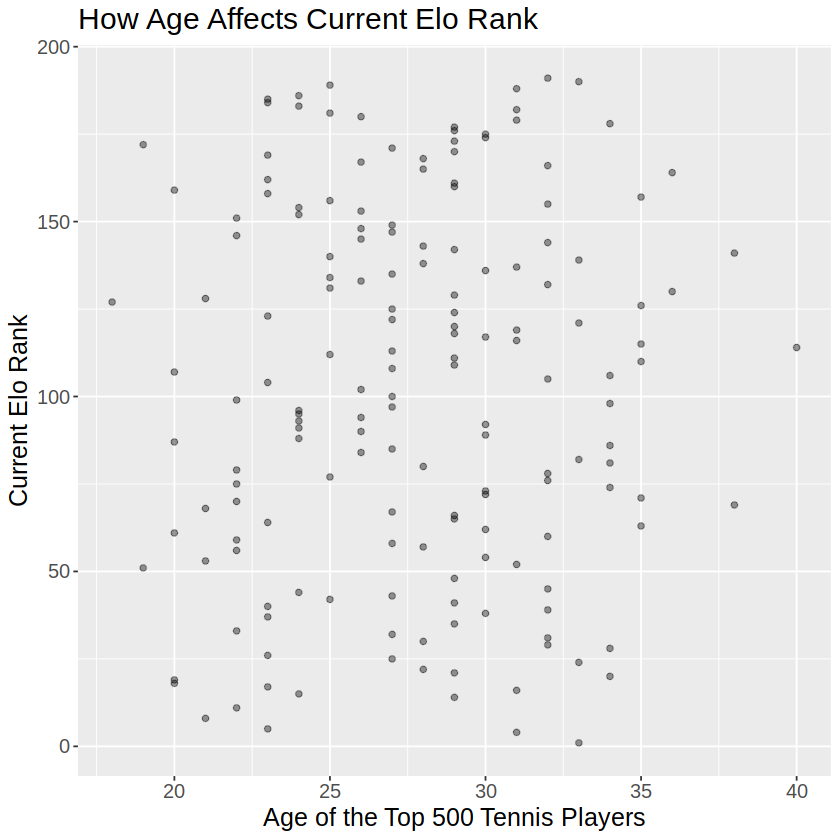

In [47]:
#Methods and Results C
#Three Initial Scatter Plots
age_money_plot <- player_data_cleaned |>
    ggplot(aes(x=age, y= prize_money))+
    geom_point(alpha=0.4)+
    labs(x="Age of the Top 500 Tennis Players", y= "Prize Money (Scaled)") +
    scale_y_log10() +
    ggtitle("How Age Affects Prize Money") +
    theme(text = element_text(size=15))
ggsave("age_money_plot.png",age_money_plot)
age_money_plot

age_rank_plot <- player_data_cleaned |>
    ggplot(aes(x=age, y= current_rank))+
    geom_point(alpha=0.4)+
    labs(x="Age of the Top 500 Tennis Players", y= "Current Rank") +
    ggtitle("How Age Affects Current Rank") +
    theme(text = element_text(size=15))
ggsave("age_rank_plot.png",age_rank_plot)
age_rank_plot

age_elo_plot <- player_data_cleaned |>
    ggplot(aes(x=age, y= current_elo_rank))+
    geom_point(alpha=0.4)+
    labs(x="Age of the Top 500 Tennis Players", y= "Current Elo Rank") +
    ggtitle("How Age Affects Current Elo Rank")+
    theme(text = element_text(size=15))
ggsave("age_elo_plot.png", age_elo_plot)
age_elo_plot

### Data Analysis
The data analysis includes:
1. Finding the best K value for Prize Money
2. Finding the best K value for Current Rank
3. Finding the best K value for Current Elo Rank

### 1. Finding the best K value for Prize Money

This section will focus on finding the best K value for Prize Money. We included the recipe as well as the model that include a specification which includes the 5-fold validation by setting `neighbors = tune()`. Additionally, combining the two into a workflow to find K. Which would be the ideal K value for nearest neighbors. 

In [48]:
#KNN Regression on Prize Money
#Pre-process
set.seed(143)
prize_money_recipe <- recipe(prize_money ~ age, data = player_training) |>
    step_scale(all_predictors()) |>
    step_center(all_predictors())

prize_money_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
    set_engine("kknn") |>
    set_mode("regression")

prize_money_wrkflw <- workflow() |>
    add_recipe(prize_money_recipe) |>
    add_model(prize_money_spec)

prize_money_gridvals <- tibble(neighbors = seq(from = 1, to = 100, by = 5))

#Results of the Workflow + Finding best N
prize_money_results <- prize_money_wrkflw |>
    tune_grid(resamples = prize_money_vfold, grid = prize_money_gridvals) |>
    collect_metrics() |>
    filter(.metric == "rmse") |>
    arrange(mean) 
head(prize_money_results)

! Fold1: preprocessor 1/1, model 1/1: 96 samples were requested but there were 96 rows in the data. 91 will be...

! Fold2: preprocessor 1/1, model 1/1: 96 samples were requested but there were 100 rows in the data. 95 will b...

! Fold3: preprocessor 1/1, model 1/1: 96 samples were requested but there were 100 rows in the data. 95 will b...

! Fold4: preprocessor 1/1, model 1/1: 96 samples were requested but there were 100 rows in the data. 95 will b...

! Fold5: preprocessor 1/1, model 1/1: 96 samples were requested but there were 100 rows in the data. 95 will b...



neighbors .metric .estimator mean    n std_err .config              
1 61        rmse    standard   7962378 5 3940136 Preprocessor1_Model13
2 56        rmse    standard   7986870 5 3920994 Preprocessor1_Model12
3 36        rmse    standard   7991160 5 3873359 Preprocessor1_Model08
4 41        rmse    standard   7999370 5 3903931 Preprocessor1_Model09
5 51        rmse    standard   8005997 5 3918529 Preprocessor1_Model11
6 46        rmse    standard   8009169 5 3918196 Preprocessor1_Model10

Figure 2.7: Table of K-values in ascending mean value

Next, we can compare the results of what we found. We can see that the neighbor value of 51 has the lowest mean, which is what we would be looking for. This would make sense as this neighbor value would correspond to the minimum RMSPE value.

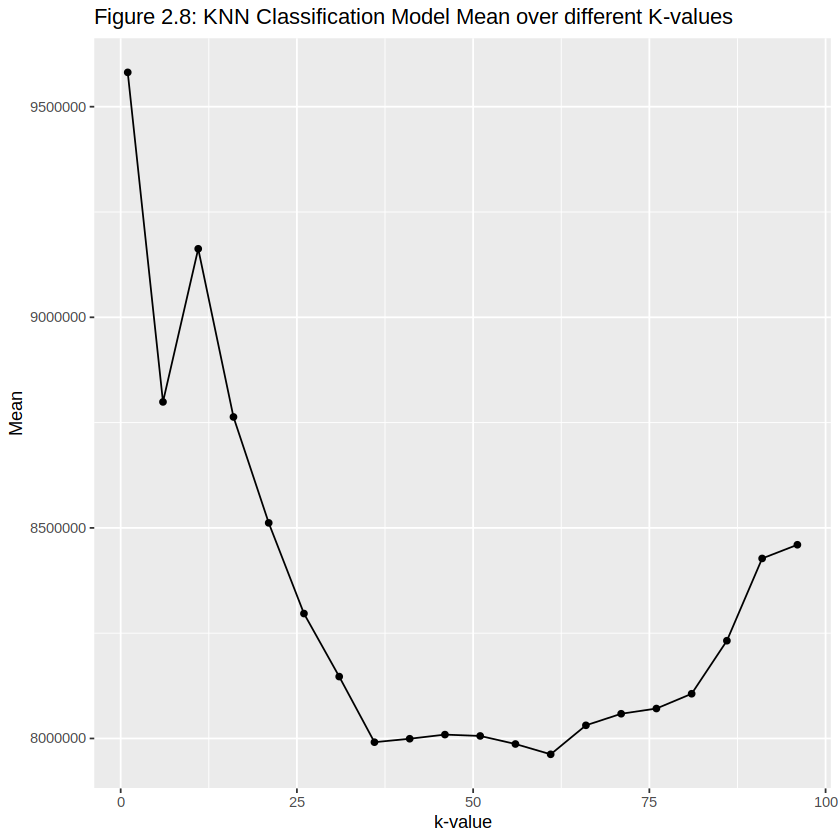

In [49]:
prize_money_k_graph <- ggplot(prize_money_results, aes(x = neighbors, y = mean)) +
        geom_point() + geom_line() +
        labs(title = "Figure 2.8: KNN Classification Model Mean over different K-values",
             x = "k-value", y = "Mean")
prize_money_k_graph

To validate that the neighbor best fit would be 51.

In [50]:
prize_money_nvalue <- prize_money_results |>
    slice_min(mean, n =1)

prize_money_nvalue #Best N Value, smallest mean

neighbors .metric .estimator mean    n std_err .config              
1 61        rmse    standard   7962378 5 3940136 Preprocessor1_Model13

Figure 2.9: Best N value

### Building the Model

Now that we have the best N value for this data set, 51, we are able to create the final workflow for this regression. We created the new model, named `prize_money_spec1`, with the final workflow named `prize_money_fit`. This will be the final model/workflow that is used for the regression for Prize Money. 

In [51]:
#Rerunning the KNN Regression with the best N
set.seed(143)
prize_money_spec1 <- nearest_neighbor(weight_func = "rectangular", neighbors = 51) |>
    set_engine("kknn") |>
    set_mode("regression")

prize_money_fit <- workflow() |>
    add_recipe(prize_money_recipe) |>
    add_model(prize_money_spec1) |>
    fit(data = player_training)
prize_money_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(51,     data, 5), kernel = ~"rectangular")

Type of response variable: continuous
minimal mean absolute error: 3562237
Minimal mean squared error: 1.159988e+14
Best kernel: rectangular
Best k: 51

Next, we can see the predicted prize winnings for each age individually, the process is included below as well as peeking into the tibble.

In [52]:
#Rerunning the KNN Regression with the best N
#predicts associated money values with age, "by=1" so that it predicts for every age
prize_money_predgrid <- tibble(
    age = seq(from = player_data_cleaned |>
    select(age) |>
    min(),
    to = player_data_cleaned |>
    select(age) |>
    max(),
    by = 1))

#combines predicted values with original data frame
prize_money_preds <-prize_money_fit |>
    predict(prize_money_predgrid) |>
    bind_cols(prize_money_predgrid)
head(prize_money_preds)

.pred   age
1 1609070 18 
2 1609070 19 
3 1609070 20 
4 1609070 21 
5 1609070 22 
6 1661183 23

Figure 2.10: Predicted prize money by age

### Regression Graph


Now, we can finally graph the regression line with the data set. Which is included below. We do see a trend within the data that will be discussed later on.

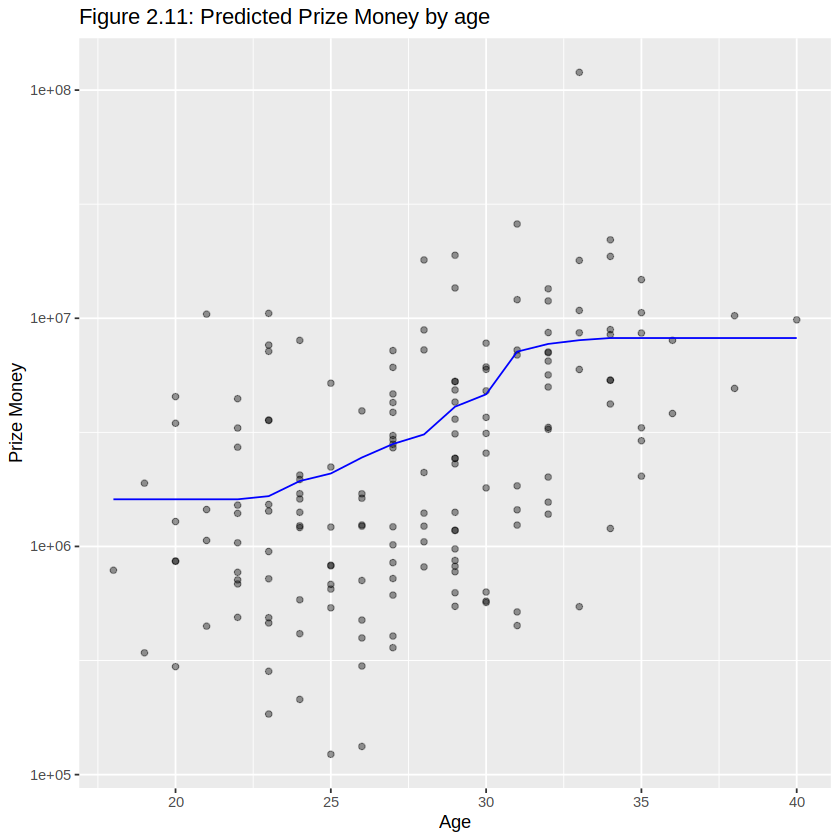

In [69]:
#Graph of the KNN regression
prize_money_final <- player_data_cleaned |>
    ggplot(aes(x = age, y = prize_money)) +
    geom_point(alpha = 0.4) +
    geom_line(data = prize_money_preds,
              mapping = aes(x = age, y = .pred),
              colour = "blue") +
    labs(x = "Age", y = "Prize Money", title="Figure 2.11: Predicted Prize Money by age") +
    scale_y_log10()
prize_money_final

### 2. Finding the best K value for Current Rank

The same process to find the best K value for Current Rank will be the same as finding the best K value for Prize Money.

In [54]:
#KNN Regression on Current Rank
#Pre-process
set.seed(143)
current_rank_recipe <- recipe(current_rank ~ age, data = player_training) |>
    step_scale(all_predictors()) |>
    step_center(all_predictors())

current_rank_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
    set_engine("kknn") |>
    set_mode("regression")

current_rank_wrkflw <- workflow() |>
    add_recipe(current_rank_recipe) |>
    add_model(current_rank_spec)

current_rank_gridvals <- tibble(neighbors = seq(from = 1, to = 100, by = 5))

#Results of the Workflow + Finding best N
current_rank_results <- current_rank_wrkflw |>
    tune_grid(resamples = current_rank_vfold, grid = current_rank_gridvals) |>
    collect_metrics() |>
    filter(.metric == "rmse") |>
    arrange(mean)
head(current_rank_results)

! Fold1: preprocessor 1/1, model 1/1: 96 samples were requested but there were 96 rows in the data. 91 will be...

! Fold2: preprocessor 1/1, model 1/1: 96 samples were requested but there were 100 rows in the data. 95 will b...

! Fold3: preprocessor 1/1, model 1/1: 96 samples were requested but there were 100 rows in the data. 95 will b...

! Fold4: preprocessor 1/1, model 1/1: 96 samples were requested but there were 100 rows in the data. 95 will b...

! Fold5: preprocessor 1/1, model 1/1: 96 samples were requested but there were 100 rows in the data. 95 will b...



neighbors .metric .estimator mean     n std_err  .config              
1 71        rmse    standard   78.68137 5 6.034255 Preprocessor1_Model15
2 81        rmse    standard   78.69769 5 5.852418 Preprocessor1_Model17
3 86        rmse    standard   78.73867 5 5.834473 Preprocessor1_Model18
4 76        rmse    standard   78.84927 5 5.875637 Preprocessor1_Model16
5 91        rmse    standard   79.01834 5 5.870208 Preprocessor1_Model19
6 96        rmse    standard   79.13521 5 5.903270 Preprocessor1_Model20

Figure 2.12: Table of K-values in ascending mean value

Now, we can see graph the mean along the neighbor value to find the optimal neighbor values.

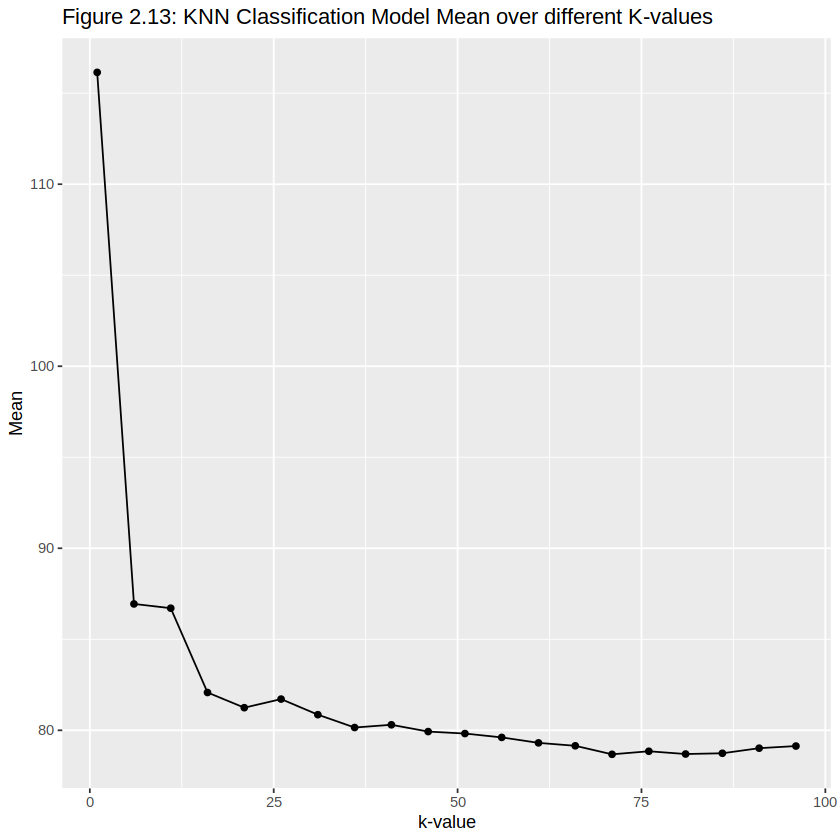

In [55]:
current_rank_k_graph <- ggplot(current_rank_results, aes(x = neighbors, y = mean)) +
        geom_point() + geom_line() +
        labs(title = "Figure 2.13: KNN Classification Model Mean over different K-values",
             x = "k-value", y = "Mean")
current_rank_k_graph

In [56]:
current_rank_nvalue <- current_rank_results |>
    slice_min(mean, n =1)

current_rank_nvalue #Best N Value, smallest mean

neighbors .metric .estimator mean     n std_err  .config              
1 71        rmse    standard   78.68137 5 6.034255 Preprocessor1_Model15

Figure 2.14: Best N value

### Building the Model

Now that we have the best neighbor value of 71, we can create the new model with the ideal neighbor value. As well as building the final workflow for this section.

In [57]:
#Rerunning the KNN Regression with the best N
current_rank_spec1 <- nearest_neighbor(weight_func = "rectangular", neighbors = 71) |>
    set_engine("kknn") |>
    set_mode("regression")

current_ranking_fit <- workflow() |>
    add_recipe(current_rank_recipe) |>
    add_model(current_rank_spec1) |>
    fit(data = player_training)
current_ranking_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(71,     data, 5), kernel = ~"rectangular")

Type of response variable: continuous
minimal mean absolute error: 61.08542
Minimal mean squared error: 6323.375
Best kernel: rectangular
Best k: 71

Next, we apply the workflow to the cleaned data to find the predicted ranking for each age, we see how the ranking for those who are at lower ranking are older in comparison to those who are younger.

In [58]:
#predicts associated rank values with age, "by=1" so that it predicts for every age
currentrank_predgrid <- tibble(
    age = seq(from = player_data_cleaned |>
    select(age) |>
    min(),
    to = player_data_cleaned |>
    select(age) |>
    max(),
    by = 1))

#combines predicted values with original data frame
current_ranking_preds <- current_ranking_fit |>
    predict(currentrank_predgrid) |>
    bind_cols(currentrank_predgrid)
tail(current_ranking_preds)
head(current_ranking_preds)

.pred    age
1 122.6901 35 
2 122.6901 36 
3 122.6901 37 
4 122.6901 38 
5 122.6901 39 
6 122.6901 40

.pred    age
1 100.8732 18 
2 100.8732 19 
3 100.8732 20 
4 100.8732 21 
5 100.8732 22 
6 100.8732 23

Figure 2.15: Predicted Current rank by age

### Regression Graph

Next, included is the regression graph which predicts current rank by age.

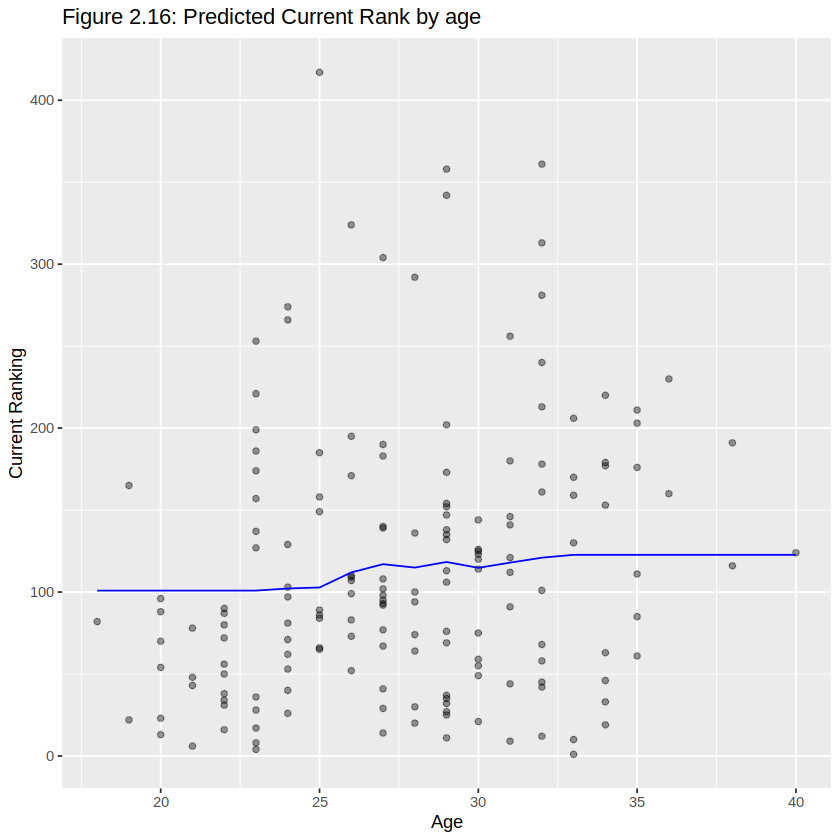

In [59]:
#Graph of the KNN regression
current_ranking_final <- player_data_cleaned |>
    ggplot(aes(x = age, y = current_rank)) +
    geom_point(alpha = 0.4) +
    geom_line(data = current_ranking_preds,
              mapping = aes(x = age, y = .pred),
              colour = "blue") +
    labs(x = "Age", y = "Current Ranking", title="Figure 2.16: Predicted Current Rank by age") 
current_ranking_final

### 3. Finding the best K Value for Current Rank

The same process is applied for this model to predict Current Rank with age. We see how we are finding the optimal K value once again...

In [60]:
set.seed(143)

#KNN Regression on Current Elo Ranking
#Pre-process
current_elo_r_recipe <- recipe(current_elo_rank ~ age, data = player_training) |>
    step_scale(all_predictors()) |>
    step_center(all_predictors())

current_elo_r_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
    set_engine("kknn") |>
    set_mode("regression")

current_elo_r_wrkflw <- workflow() |>
    add_recipe(current_elo_r_recipe) |>
    add_model(current_elo_r_spec)

current_elo_r_gridvals <- tibble(neighbors = seq(from = 1, to = 100, by = 5))

#Results of the Workflow + Finding best N
current_elo_r_results <- current_elo_r_wrkflw |>
    tune_grid(resamples = current_elo_r_vfold, grid = current_elo_r_gridvals) |>
    collect_metrics() |>
    filter(.metric == "rmse") |>
    arrange(mean)
head(current_elo_r_results)

! Fold1: preprocessor 1/1, model 1/1: 96 samples were requested but there were 96 rows in the data. 91 will be...

! Fold2: preprocessor 1/1, model 1/1: 96 samples were requested but there were 100 rows in the data. 95 will b...

! Fold3: preprocessor 1/1, model 1/1: 96 samples were requested but there were 100 rows in the data. 95 will b...

! Fold4: preprocessor 1/1, model 1/1: 96 samples were requested but there were 100 rows in the data. 95 will b...

! Fold5: preprocessor 1/1, model 1/1: 96 samples were requested but there were 100 rows in the data. 95 will b...



neighbors .metric .estimator mean     n std_err  .config              
1 81        rmse    standard   52.46328 5 1.587139 Preprocessor1_Model17
2 91        rmse    standard   52.47450 5 1.494420 Preprocessor1_Model19
3 96        rmse    standard   52.51282 5 1.481795 Preprocessor1_Model20
4 86        rmse    standard   52.54038 5 1.528476 Preprocessor1_Model18
5 51        rmse    standard   52.66872 5 1.285814 Preprocessor1_Model11
6 61        rmse    standard   52.69265 5 1.440051 Preprocessor1_Model13

Figure 2.17: Table of K-values in ascending mean value

We can also graph the mean with neighbor values. We see how a neighbor value of 81 has the lowest mean which would correlate to the value in which we would use.

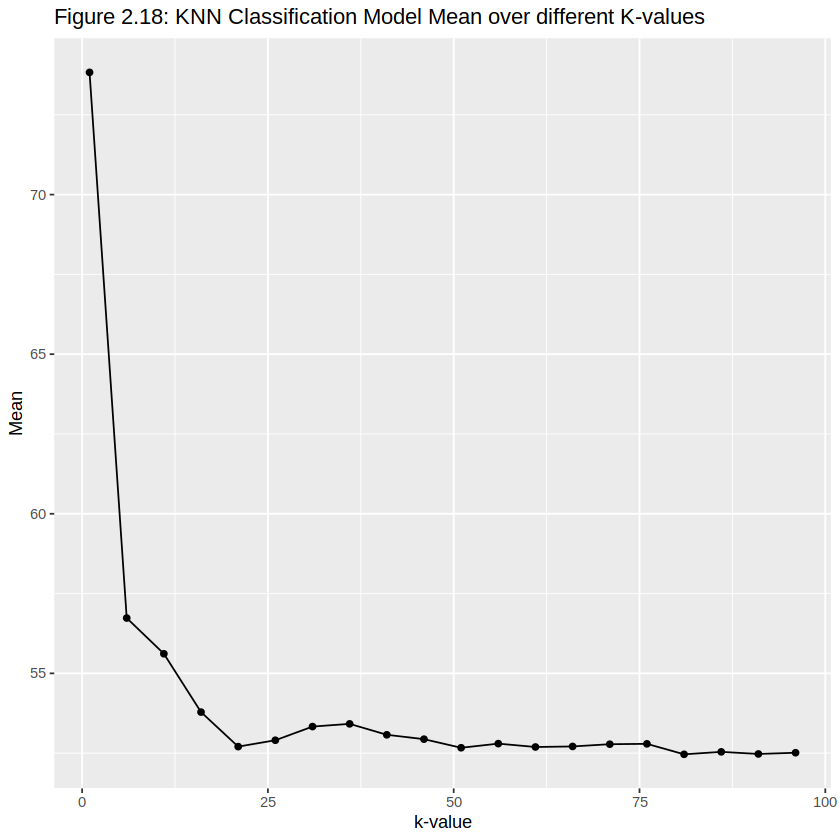

In [61]:
current_elo_rank_k_graph <- ggplot(current_elo_r_results, aes(x = neighbors, y = mean)) +
        geom_point() + geom_line() +
        labs(title = "Figure 2.18: KNN Classification Model Mean over different K-values",
             x = "k-value", y = "Mean")
current_elo_rank_k_graph

In [62]:
current_elo_r_nvalue <- current_elo_r_results |>
    slice_min(mean, n =1)

current_elo_r_nvalue #Best N Value, smallest mean

neighbors .metric .estimator mean     n std_err  .config              
1 81        rmse    standard   52.46328 5 1.587139 Preprocessor1_Model17

Figure 2.19: Best N value

The neighbors with the lowest mean is 81, meaning that the neighbor value we will use for the final model is 81.

### Building the Model

A new model was created with the new neighbor value, we will then create a new workflow using the model.

In [63]:
#Rerunning the KNN Regression with the best N
current_elo_r_spec1 <- nearest_neighbor(weight_func = "rectangular", neighbors = 81) |>
    set_engine("kknn") |>
    set_mode("regression")

current_elo_r_fit <- workflow() |>
    add_recipe(current_elo_r_recipe) |>
    add_model(current_elo_r_spec1) |>
    fit(data = player_training)

#predicts associated rank values with age, "by=1" so that it predicts for every age
current_elo_r_predgrid <- tibble(
    age = seq(from = player_data_cleaned |>
    select(age) |>
    min(),
    to = player_data_cleaned |>
    select(age) |>
    max(),
    by = 1))

#combines predicted values with original data frame
current_elo_r_preds <- current_elo_r_fit |>
    predict(current_elo_r_predgrid) |>
    bind_cols(current_elo_r_predgrid)
head(current_elo_r_preds)
tail(current_elo_r_preds)

.pred    age
1 103.3704 18 
2 103.3704 19 
3 103.3704 20 
4 103.3704 21 
5 103.3704 22 
6 103.3704 23

.pred    age
1 100.8025 35 
2 100.8025 36 
3 100.8025 37 
4 100.8025 38 
5 100.8025 39 
6 100.8025 40

Figure 2.20: Predicted Current Elo Rank by age

### Regression Graph

Included below is the graph and visualization of the data set with the regression line.

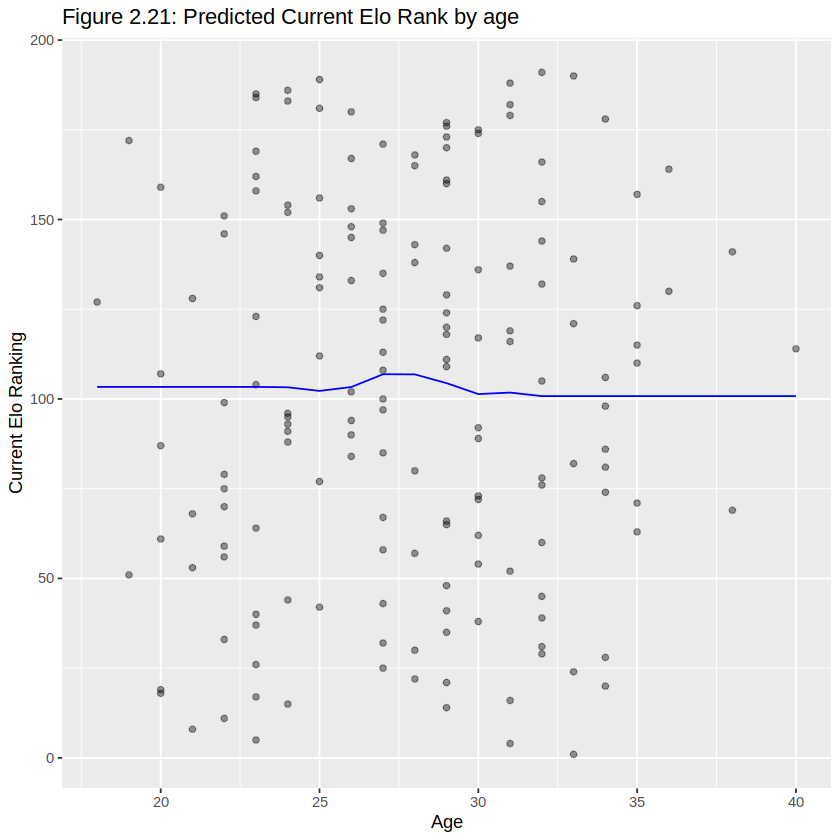

In [64]:
#Graph of the KNN regression
current_elo_r_final <- player_data_cleaned |>
    ggplot(aes(x = age, y = current_elo_rank)) +
    geom_point(alpha = 0.4) +
    geom_line(data = current_elo_r_preds,
              mapping = aes(x = age, y = .pred),
              colour = "blue") +
    labs(x = "Age", y = "Current Elo Ranking", title="Figure 2.21: Predicted Current Elo Rank by age") 
current_elo_r_final

### Creating Regression Models

! Fold1: preprocessor 1/1, model 1/1: 96 samples were requested but there were 96 rows in the data. 91 will be...

! Fold2: preprocessor 1/1, model 1/1: 96 samples were requested but there were 100 rows in the data. 95 will b...

! Fold3: preprocessor 1/1, model 1/1: 96 samples were requested but there were 100 rows in the data. 95 will b...

! Fold4: preprocessor 1/1, model 1/1: 96 samples were requested but there were 100 rows in the data. 95 will b...

! Fold5: preprocessor 1/1, model 1/1: 96 samples were requested but there were 100 rows in the data. 95 will b...



neighbors .metric .estimator mean     n std_err  .config              
1 86        rmse    standard   78.46196 5 7.578256 Preprocessor1_Model18

.metric .estimator .estimate
1 rmse    standard   85.28231

.pred    age
1 103.2558 18 
2 103.2558 19 
3 103.2558 20 
4 103.2558 21 
5 103.2558 22 
6 103.2558 23

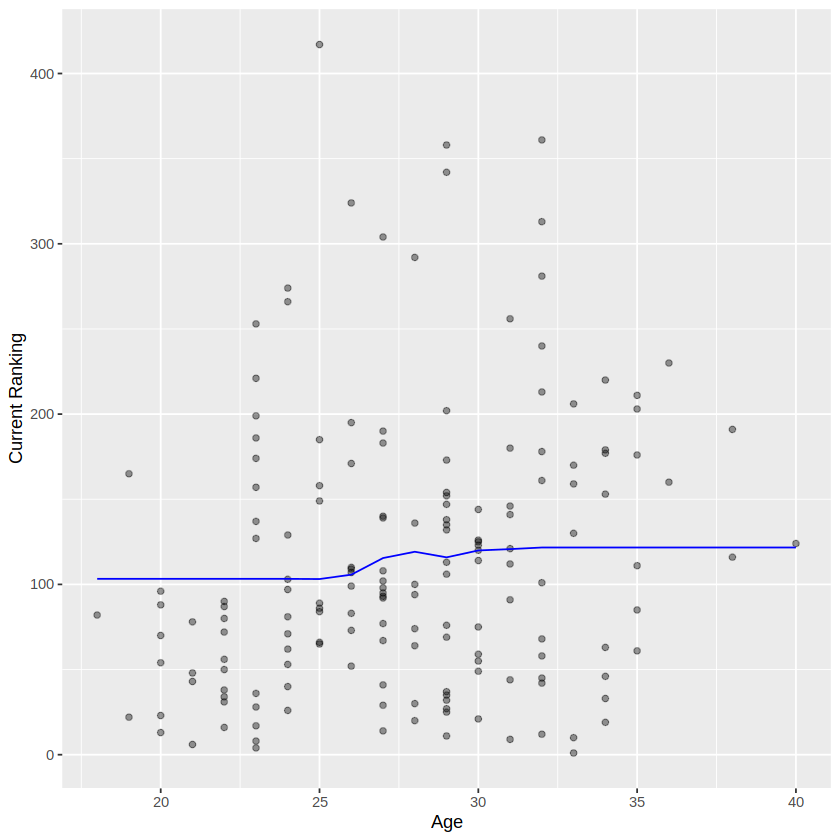

In [65]:
#Methods & Results D
#Splits the data into training and testing sets
set.seed(143) #ensures all randomized functions work the same
data_split <- initial_split(player_data_cleaned, prop = 0.75, strata = prize_money)
player_training <- training(data_split)
player_testing <- testing(data_split)

#KNN Regression on Current Rank
#Pre-process
current_rank_recipe <- recipe(current_rank ~ age, data = player_training) |>
    step_scale(all_predictors()) |>
    step_center(all_predictors())

current_rank_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
    set_engine("kknn") |>
    set_mode("regression")

current_rank_vfold <- vfold_cv(player_training, v = 5, strata = current_rank)
#in splitting section

current_rank_wrkflw <- workflow() |>
    add_recipe(current_rank_recipe) |>
    add_model(current_rank_spec)

current_rank_gridvals <- tibble(neighbors = seq(from = 1, to = 100, by = 5))

#Results of the Workflow + Finding best N
current_rank_results <- current_rank_wrkflw |>
    tune_grid(resamples = current_rank_vfold, grid = current_rank_gridvals) |>
    collect_metrics() |>
    filter(.metric == "rmse")

current_rank_nvalue <- current_rank_results |>
    slice_min(mean, n =1)

current_rank_nvalue #Best N Value, smallest mean

#Rerunning the KNN Regression with the best N
current_rank_spec1 <- nearest_neighbor(weight_func = "rectangular", neighbors = 86) |>
    set_engine("kknn") |>
    set_mode("regression")

current_ranking_fit <- workflow() |>
    add_recipe(current_rank_recipe) |>
    add_model(current_rank_spec1) |>
    fit(data = player_training)

current_ranking_fit_summary <- current_ranking_fit |>
    predict(player_testing) |>
    bind_cols(player_testing) |>
    metrics(truth = age, estimate = .pred) |>
    filter(.metric == "rmse")

current_ranking_fit_summary #according to textbook the error is the .estimate value


#predicts associated rank values with age, "by=1" so that it predicts for every age
currentrank_predgrid <- tibble(
    age = seq(from = player_data_cleaned |>
    select(age) |>
    min(),
    to = player_data_cleaned |>
    select(age) |>
    max(),
    by = 1))

#combines predicted values with original data frame
current_ranking_preds <- current_ranking_fit |>
    predict(currentrank_predgrid) |>
    bind_cols(currentrank_predgrid)
head(current_ranking_preds)

#Graph of the KNN regression
current_ranking_final <- player_data_cleaned |>
    ggplot(aes(x = age, y = current_rank)) +
    geom_point(alpha = 0.4) +
    geom_line(data = current_ranking_preds,
              mapping = aes(x = age, y = .pred),
              colour = "blue") +
    labs(x = "Age", y = "Current Ranking", ) 
current_ranking_final

! Fold1: preprocessor 1/1, model 1/1: 96 samples were requested but there were 96 rows in the data. 91 will be...

! Fold2: preprocessor 1/1, model 1/1: 96 samples were requested but there were 100 rows in the data. 95 will b...

! Fold3: preprocessor 1/1, model 1/1: 96 samples were requested but there were 100 rows in the data. 95 will b...

! Fold4: preprocessor 1/1, model 1/1: 96 samples were requested but there were 100 rows in the data. 95 will b...

! Fold5: preprocessor 1/1, model 1/1: 96 samples were requested but there were 100 rows in the data. 95 will b...



neighbors .metric .estimator mean     n std_err  .config              
1 96        rmse    standard   52.70223 5 1.243212 Preprocessor1_Model20

.metric .estimator .estimate
1 rmse    standard   75.93768

.pred    age
1 102.4375 18 
2 102.4375 19 
3 102.4375 20 
4 102.4375 21 
5 102.4375 22 
6 102.4375 23

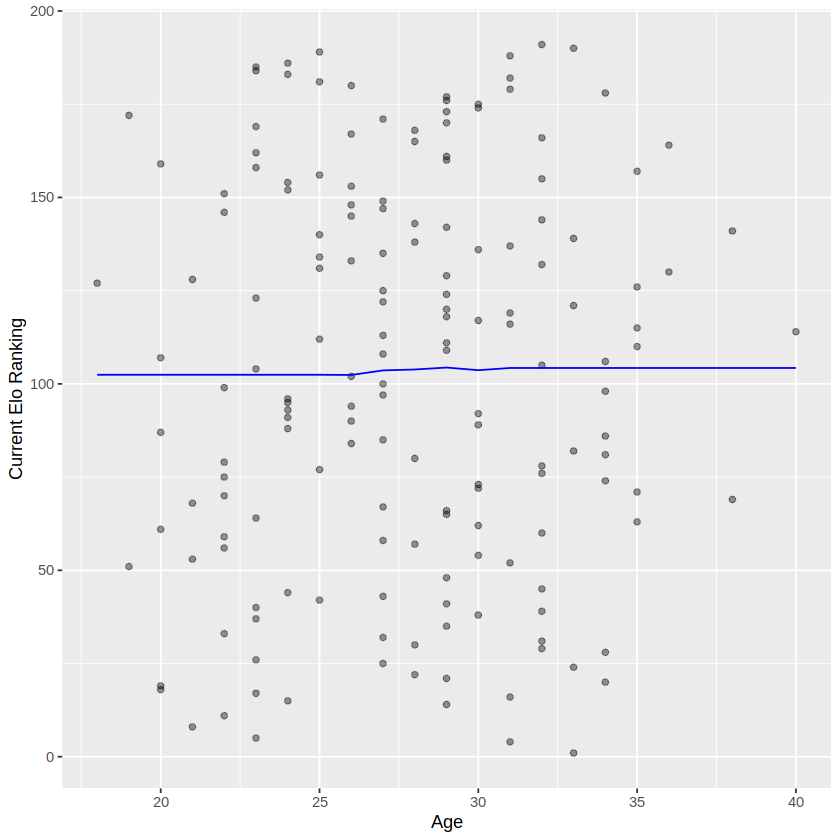

In [66]:
set.seed(143)

#KNN Regression on Current Elo Ranking
#Pre-process
current_elo_r_recipe <- recipe(current_elo_rank ~ age, data = player_training) |>
    step_scale(all_predictors()) |>
    step_center(all_predictors())

current_elo_r_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
    set_engine("kknn") |>
    set_mode("regression")

current_elo_r_vfold <- vfold_cv(player_training, v = 5, strata = current_elo_rank)

current_elo_r_wrkflw <- workflow() |>
    add_recipe(current_elo_r_recipe) |>
    add_model(current_elo_r_spec)

current_elo_r_gridvals <- tibble(neighbors = seq(from = 1, to = 100, by = 5))

#Results of the Workflow + Finding best N
current_elo_r_results <- current_elo_r_wrkflw |>
    tune_grid(resamples = current_elo_r_vfold, grid = current_elo_r_gridvals) |>
    collect_metrics() |>
    filter(.metric == "rmse")

current_elo_r_nvalue <- current_elo_r_results |>
    slice_min(mean, n =1)

current_elo_r_nvalue #Best N Value, smallest mean

#Rerunning the KNN Regression with the best N
current_elo_r_spec1 <- nearest_neighbor(weight_func = "rectangular", neighbors = 96) |>
    set_engine("kknn") |>
    set_mode("regression")

current_elo_r_fit <- workflow() |>
    add_recipe(current_elo_r_recipe) |>
    add_model(current_elo_r_spec1) |>
    fit(data = player_training)

current_elo_r_fit_summary <- current_elo_r_fit |>
    predict(player_testing) |>
    bind_cols(player_testing) |>
    metrics(truth = age, estimate = .pred) |>
    filter(.metric == "rmse")

current_elo_r_fit_summary #according to textbook the error is the .estimate value


#predicts associated rank values with age, "by=1" so that it predicts for every age
current_elo_r_predgrid <- tibble(
    age = seq(from = player_data_cleaned |>
    select(age) |>
    min(),
    to = player_data_cleaned |>
    select(age) |>
    max(),
    by = 1))

#combines predicted values with original data frame
current_elo_r_preds <- current_elo_r_fit |>
    predict(current_elo_r_predgrid) |>
    bind_cols(current_elo_r_predgrid)
head(current_elo_r_preds)

#Graph of the KNN regression
current_elo_r_final <- player_data_cleaned |>
    ggplot(aes(x = age, y = current_elo_rank)) +
    geom_point(alpha = 0.4) +
    geom_line(data = current_elo_r_preds,
              mapping = aes(x = age, y = .pred),
              colour = "blue") +
    labs(x = "Age", y = "Current Elo Ranking") 
current_elo_r_final

! Fold1: preprocessor 1/1, model 1/1: 96 samples were requested but there were 96 rows in the data. 91 will be...

! Fold2: preprocessor 1/1, model 1/1: 96 samples were requested but there were 100 rows in the data. 95 will b...

! Fold3: preprocessor 1/1, model 1/1: 96 samples were requested but there were 100 rows in the data. 95 will b...

! Fold4: preprocessor 1/1, model 1/1: 96 samples were requested but there were 100 rows in the data. 95 will b...

! Fold5: preprocessor 1/1, model 1/1: 96 samples were requested but there were 100 rows in the data. 95 will b...



neighbors .metric .estimator mean    n std_err .config              
1 51        rmse    standard   7581355 5 3588309 Preprocessor1_Model11

.metric .estimator .estimate
1 rmse    standard   4743548

.pred   age
1 1609070 18 
2 1609070 19 
3 1609070 20 
4 1609070 21 
5 1609070 22 
6 1661183 23

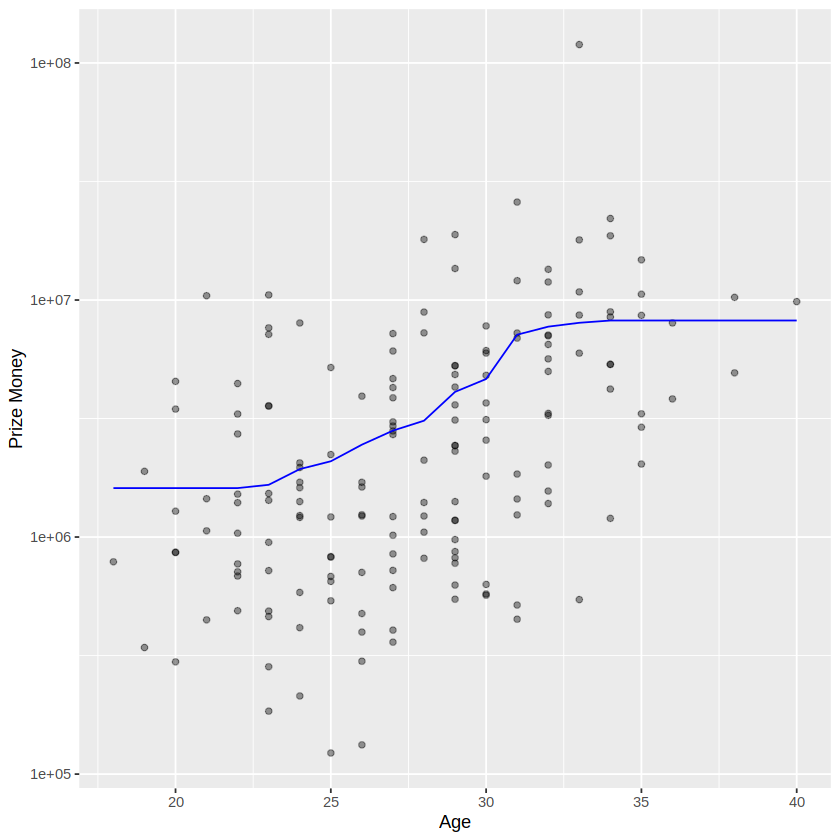

In [67]:
set.seed(143)

#KNN Regression on Prize Money
#Pre-process
prize_money_recipe <- recipe(prize_money ~ age, data = player_training) |>
    step_scale(all_predictors()) |>
    step_center(all_predictors())

prize_money_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
    set_engine("kknn") |>
    set_mode("regression")

prize_money_vfold <- vfold_cv(player_training, v = 5, strata = prize_money)


prize_money_wrkflw <- workflow() |>
    add_recipe(prize_money_recipe) |>
    add_model(prize_money_spec)

prize_money_gridvals <- tibble(neighbors = seq(from = 1, to = 100, by = 5))

#Results of the Workflow + Finding best N
prize_money_results <- prize_money_wrkflw |>
    tune_grid(resamples = prize_money_vfold, grid = prize_money_gridvals) |>
    collect_metrics() |>
    filter(.metric == "rmse")

prize_money_nvalue <- prize_money_results |>
    slice_min(mean, n =1)

prize_money_nvalue #Best N Value, smallest mean

#Rerunning the KNN Regression with the best N
prize_money_spec1 <- nearest_neighbor(weight_func = "rectangular", neighbors = 51) |>
    set_engine("kknn") |>
    set_mode("regression")

prize_money_fit <- workflow() |>
    add_recipe(prize_money_recipe) |>
    add_model(prize_money_spec1) |>
    fit(data = player_training)

prize_money_fit_summary <- prize_money_fit |>
    predict(player_testing) |>
    bind_cols(player_testing) |>
    metrics(truth = age, estimate = .pred) |>
    filter(.metric == "rmse")

prize_money_fit_summary #according to textbook the error is the .estimate value


#predicts associated money values with age, "by=1" so that it predicts for every age
prize_money_predgrid <- tibble(
    age = seq(from = player_data_cleaned |>
    select(age) |>
    min(),
    to = player_data_cleaned |>
    select(age) |>
    max(),
    by = 1))

#combines predicted values with original data frame
prize_money_preds <-prize_money_fit |>
    predict(prize_money_predgrid) |>
    bind_cols(prize_money_predgrid)
head(prize_money_preds)

#Graph of the KNN regression
prize_money_final <- player_data_cleaned |>
    ggplot(aes(x = age, y = prize_money)) +
    geom_point(alpha = 0.4) +
    geom_line(data = prize_money_preds,
              mapping = aes(x = age, y = .pred),
              colour = "blue") +
    labs(x = "Age", y = "Prize Money") +
    scale_y_log10()
prize_money_final

## Discussion

## Summary of Results


## Interpreting Results and Implications


## Suggestions for Future Research
